# Load and Visualize the Dataset

In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
# Explore the dataset
print("Data shape:", digits.data.shape)
print("Images shape:", digits.images.shape)
print("Target shape:", digits.target.shape)
print("Feature names:", digits.feature_names[:10])
print("Target names:", digits.target_names)

Data shape: (1797, 64)
Images shape: (1797, 8, 8)
Target shape: (1797,)
Feature names: ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1']
Target names: [0 1 2 3 4 5 6 7 8 9]


In [4]:
import matplotlib.pyplot as plt

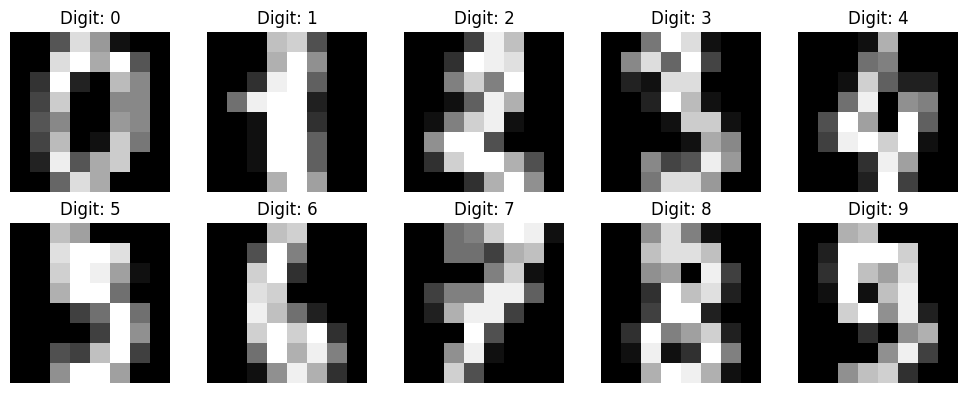

In [10]:
# Visualize the first 10 digits
fig, axes = plt.subplots(2, 5, figsize=(10,4))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Digit: {digits.target[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

#Normalize the Features

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(digits.data)

In [14]:
# Verify the scaling (optional)
print("Original data range (32nd feature):", digits.data[:, 31].min(), digits.data[:, 31].max())
print("Scaled data range (32nd feature):", scaled_data[:, 31].min(), scaled_data[:, 31].max())

Original data range (32nd feature): 0.0 1.0
Scaled data range (32nd feature): 0.0 1.0


#Train the KNN Classifier

####Split the dataset into training and testing sets

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(scaled_data,digits.target,test_size=0.3,random_state=55)

####KNN classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

#Tune the K Value

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
# Range of K values to try
k_values = range(1, 21)
accuracy_scores = []

# Train and evaluate the KNN classifier for each K value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)


In [25]:
accuracy_scores

[0.9888888888888889,
 0.9851851851851852,
 0.9907407407407407,
 0.9833333333333333,
 0.987037037037037,
 0.987037037037037,
 0.9888888888888889,
 0.9851851851851852,
 0.987037037037037,
 0.9814814814814815,
 0.987037037037037,
 0.987037037037037,
 0.9888888888888889,
 0.9851851851851852,
 0.9814814814814815,
 0.9796296296296296,
 0.975925925925926,
 0.975925925925926,
 0.975925925925926,
 0.9777777777777777]

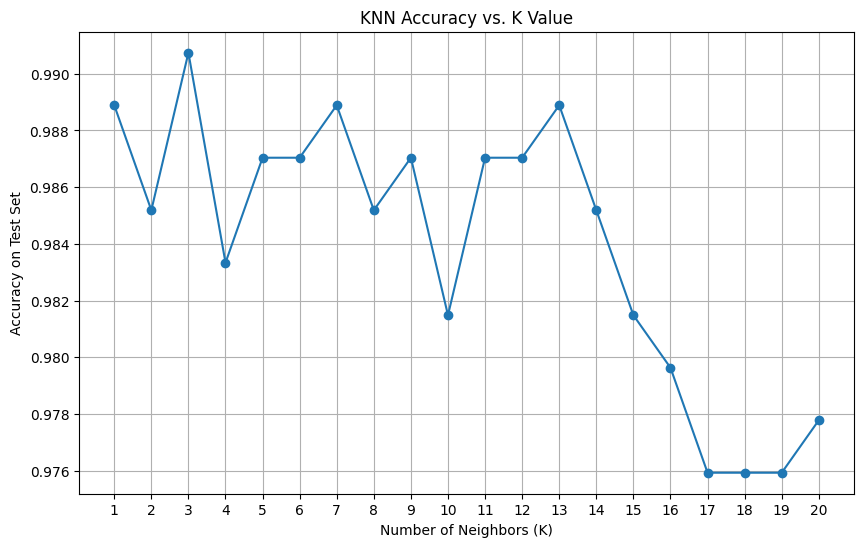

In [24]:
# Plot K vs Accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title('KNN Accuracy vs. K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy on Test Set')
plt.xticks(k_values)
plt.grid(True)
plt.show()

####Evaluate the model

In [27]:
import numpy as np

In [28]:
# Find the K value with the highest accuracy
best_k = k_values[np.argmax(accuracy_scores)]
best_accuracy = np.max(accuracy_scores)
print(f"The best K value is: {best_k} with an accuracy of: {best_accuracy:.4f}")

The best K value is: 3 with an accuracy of: 0.9907


In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [31]:
knn_best = KNeighborsClassifier(n_neighbors=3)
knn_best.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:
y_pred_best = knn_best.predict(x_test)

In [34]:
accuracy= accuracy_score(y_test,y_pred_best)
accuracy

0.9907407407407407

In [36]:
classification_report(y_test,y_pred_best)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        44\n           1       0.96      1.00      0.98        47\n           2       1.00      1.00      1.00        60\n           3       1.00      0.96      0.98        57\n           4       0.98      0.98      0.98        54\n           5       1.00      1.00      1.00        53\n           6       1.00      1.00      1.00        55\n           7       0.97      1.00      0.98        63\n           8       1.00      1.00      1.00        43\n           9       1.00      0.97      0.98        64\n\n    accuracy                           0.99       540\n   macro avg       0.99      0.99      0.99       540\nweighted avg       0.99      0.99      0.99       540\n'

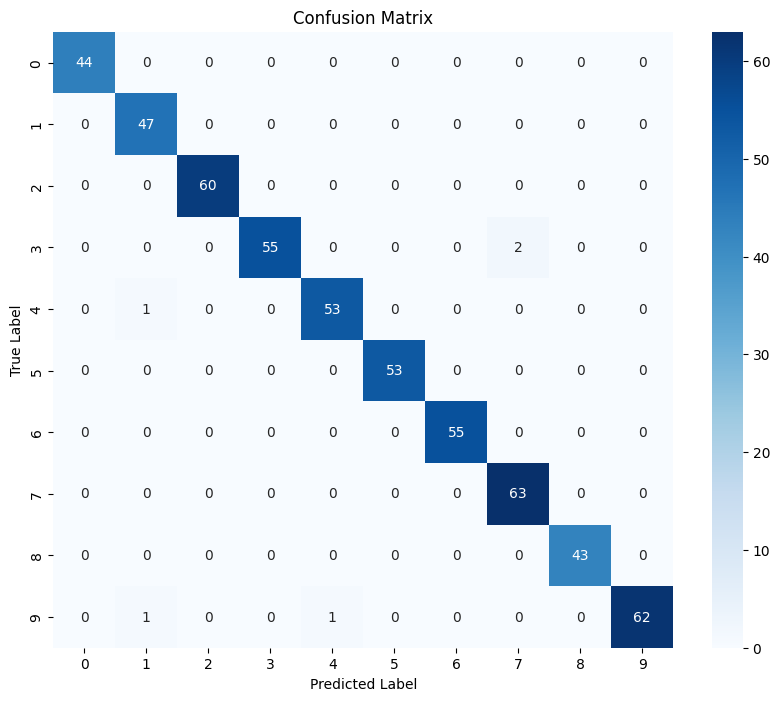

In [37]:
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(digits.target), yticklabels=np.unique(digits.target))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()